## Projeto 3

#### Bruna Kimura e Victor Hugo Leal

## O aumento da qualidade de vida altera a taxa de fertilidade?

In [1]:
%matplotlib inline
import os
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import pandas as pd
import numpy as np

import statsmodels.api as sm1 #Usa OLS com X como matriz de planejamento
import statsmodels.formula.api as sm  #Usa OLS como no R

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\Bruna\Documents\GitHub\CD\Projeto_3


In [2]:
dados = pd.read_excel('Dados.xlsx',index_col=0)
dados2 = pd.read_excel('Dados3.xlsx',index_col=0)

In [3]:
dados.head()

,HDI,UnderFiveMortality,TotalFertilityRate
Pais,,,
Abkhazia,NaN,NaN,NaN
Afghanistan,0.363,113.2,6.46
Akrotiri and Dhekelia,NaN,NaN,NaN
Åland,NaN,NaN,NaN
South Sudan,NaN,125.7,NaN


In [4]:
#Retirar NaN
dados=dados[~np.isnan(dados.HDI)]
dados=dados[~np.isnan(dados.UnderFiveMortality)]
dados=dados[~np.isnan(dados.TotalFertilityRate)]

#Retirar NaN
dados2=dados2[~np.isnan(dados2.HDI)]
dados2=dados2[~np.isnan(dados2.UnderFiveMortality)]
dados2=dados2[~np.isnan(dados2.TotalFertilityRate)]
dados2=dados2[~np.isnan(dados2.HIV)]

In [5]:
dados2.head()

,HDI,UnderFiveMortality,TotalFertilityRate,HIV
Pais,,,,
Algeria,0.680,30.7,2.66,0.1
Angola,0.471,196.4,6.52,1.9
Argentina,0.780,15.8,2.25,0.4
Armenia,0.715,21.1,1.40,0.1
Australia,0.922,5.4,1.92,0.1


### Gráficos

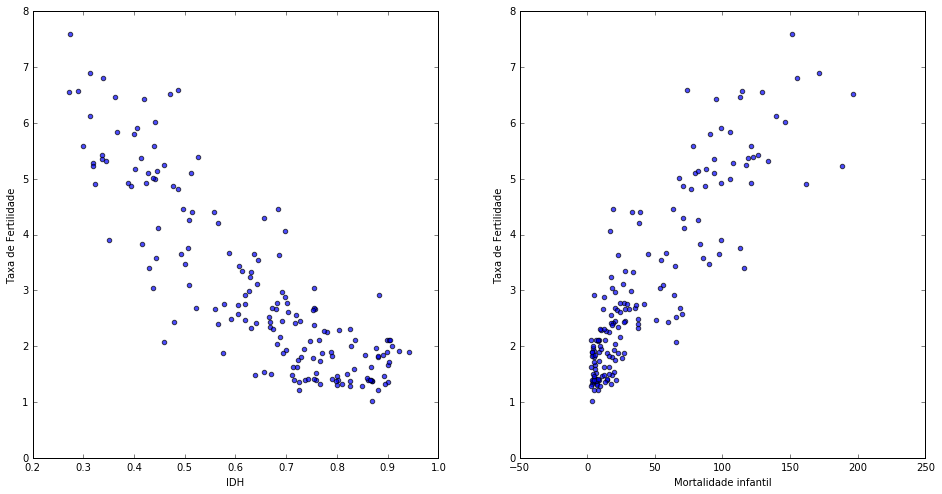

In [6]:
f, ax = plt.subplots(1,2,figsize=(16,8))
ax[0].scatter(dados.HDI, dados.TotalFertilityRate, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("IDH")
ax[0].set_ylabel("Taxa de Fertilidade")

ax[1].scatter(dados.UnderFiveMortality, dados.TotalFertilityRate, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("Mortalidade infantil")
ax[1].set_ylabel("Taxa de Fertilidade")

plt.show()

#### Com escala logarítimica


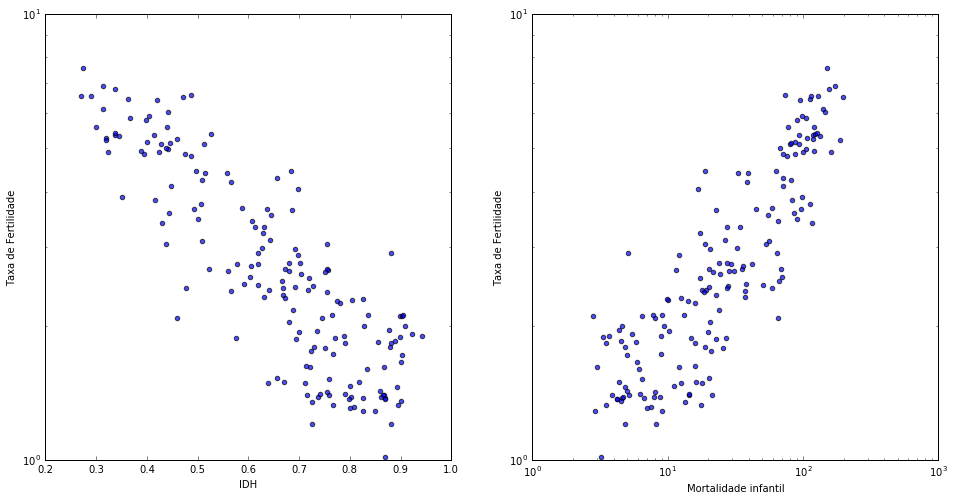

In [7]:
f, ax = plt.subplots(1,2,figsize=(16,8))


ax[0].scatter(dados.HDI, dados.TotalFertilityRate, alpha=0.7)  # Plot the raw data
ax[0].set_xlabel("IDH")
ax[0].set_ylabel("Taxa de Fertilidade")
ax[0].set_yscale('log')

ax[1].scatter(dados.UnderFiveMortality, dados.TotalFertilityRate, alpha=0.7)  # Plot the raw data
ax[1].set_xlabel("Mortalidade infantil")
ax[1].set_ylabel("Taxa de Fertilidade")
ax[1].set_yscale('log')
ax[1].set_xscale('log')


plt.show()

### Gráfico em 3D


In [8]:
dados['newUFM'] = np.log(dados['UnderFiveMortality'])
dados['newTFR'] = np.log(dados['TotalFertilityRate'])

dados2['newUFM'] = np.log(dados['UnderFiveMortality'])
dados2['newTFR'] = np.log(dados['TotalFertilityRate'])

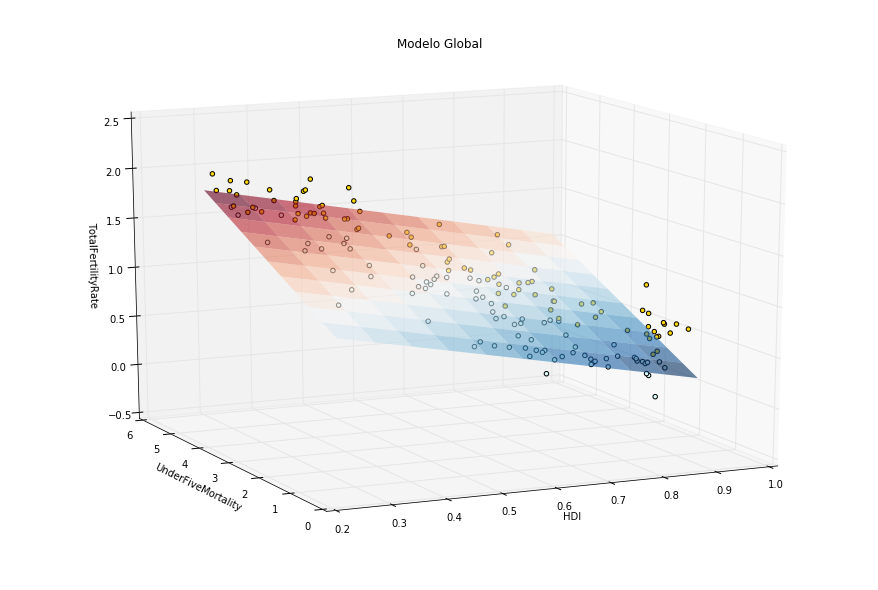

In [9]:
#%matplotlib notebook #Use esse código para poder girar o gráfico plotado
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

X = dados[['HDI', 'newUFM']]
y = dados['newTFR']

X = sm1.add_constant(X)
est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.HDI.min(), X.HDI.max(), 100), 
                       np.linspace(X.newUFM.min(), X.newUFM.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y - est.predict(X)
ax.scatter(X[resid >= 0].HDI, X[resid >= 0].newUFM, y[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X[resid < 0].HDI, X[resid < 0].newUFM, y[resid < 0], c='lightCyan', alpha=1.0)

ax.set_xlabel('HDI')
ax.set_ylabel('UnderFiveMortality')
ax.set_zlabel('TotalFertilityRate')
ax.set_title('Modelo Global')
plt.show()

In [10]:
model = sm.ols(formula='newTFR ~ HDI + newUFM', data = dados) # Describe Model
results = model.fit() # Fit model
print (results.summary())

                            OLS Regression Results                            
Dep. Variable:                 newTFR   R-squared:                       0.761
Model:                            OLS   Adj. R-squared:                  0.758
Method:                 Least Squares   F-statistic:                     268.7
Date:                Tue, 06 Dec 2016   Prob (F-statistic):           3.29e-53
Time:                        22:12:50   Log-Likelihood:                -3.6251
No. Observations:                 172   AIC:                             13.25
Df Residuals:                     169   BIC:                             22.69
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.9453      0.361      2.621      0.0

### Avaliar variáveis

#### Para avaliar se há variáveis relevantes ao modelo, utilizamos o Teste de Hipoteses com as seguintes hipóteses:

<img src="TestedeHipoteses.png",width=300,height=300>

#### Através da tabela gerada, obtemos que o Valor-P para o IDH é de 0,001%, e de 0% para a Taxa de Mortalidade. Sendo esses valores abaixo do nível de significância (alfa = 5%), para os dois casos, sempre rejeitamos a hipótese nula. Ou seja, as duas variáveis são relevantes para o modelo.

### Qualidade do ajuste:

#### Para avaliarmos a qualidade do ajuste adotado, precisamos obter o valor do R-sqrt, que pode variar entre 0 e 1. Quanto mais próximo de 1, maior será a qualidade do ajuste adotado. Através da tabela OLS, podemos observar que o R-sqrt é de 0.761, ou seja, concluimos que o ajuste de modelo é bom.

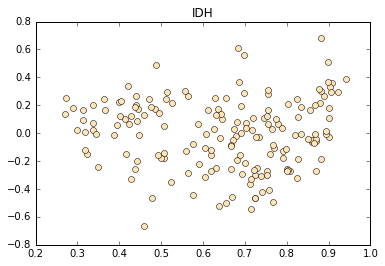

In [11]:
%matplotlib inline
plt.plot(dados.HDI, results.resid,"o", color="moccasin")
plt.title("IDH")
plt.show()

#### Pelo gráfico acima, podemos concluir que temos uma análise de resíduo "ideal", para o parâmetro IDH.

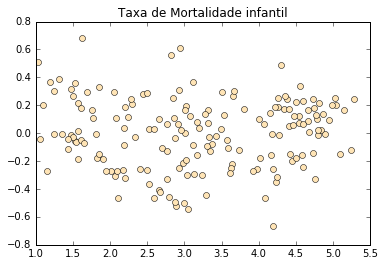

In [12]:
%matplotlib inline
plt.plot(dados.newUFM, results.resid,"o", color="moccasin")
plt.title("Taxa de Mortalidade infantil")
plt.show()

#### Pelo gráfico acima, podemos concluir que também temos uma análise de resíduo "ideal", para o parâmetro Taxa de mortalidade infantil.

### Interpretação dos parâmetros

#### A relação HDI - Taxa de Fertilidade é uma relação Log-Lin. Logo, podemos concluir que para um decrescimo de 0,1 (Beta 0) no IDH, haverá um acrescimo de 10% na Taxa de Fertilidade. 


#### A relação Taxa de Mortalidade - Taxa de Fertilidade é uma relação Log-Log. Portanto, podemos afirmar que para um acrescimo de 1% (Beta 1) na Taxa de Mortalidade haverá um acrescimo de 0,22% na Taxa de Fertilidade.

### Resumo do objetivo

#### A taxa de mortalidade infantil é uma das melhores formas de analisar a qualidade de vida de um país. Este parâmetro está inserido no meio de pesquisa de saúde de uma população. Já que a partir desses dados podemos verificar os problemas que esta população enfrenta como o saneamento básico, acesso a hospitais, remédios, vacinas, etc. Conforme esses índices aumentam, a qualidade de vida também aumenta. O texto “MORTALIDADE INFANTIL: indicador das condições de vida das populações”¹ de Álvaro Jorge Madeiro Leite e Ana maria Cavalcante e Silva, explica como este índice de mortalidade infantil implica na qualidade de vida de uma população. 

#### Como podemos ver nos nossos dados, conforme a taxa de fertilidade aumenta a taxa de mortalidade infantil também aumenta. Isto implica que para países com melhor qualidade de vida a taxa de fertilidade é mais baixa. Ou seja, para um aumento de 1% na taxa de mortalidade, haverá um aumento de 0,22% na taxa de fertilidade. Assim, temos um reta decrescente.

#### ¹Texto se encontra no seguinte link <http://www.geocities.ws/criancanordeste/documentos/morteinfantil.pdf>

#### De acordo com o livro "O Social em Questão (págs. 203-224)"² de Maria das Graças Targino, o Índice de Desenvolvimento Humano (IDH) é um medidor confiável utilizado atualmente para medir o nível da qualidade de vida de um país. E, segundo esse medidor, a proporção de pessoas com mais de 60 anos (idosos) cresce mais rapidamente que pessoas de outras faixas etárias, salvo algumas exceções.

#### Através desse mesmo livro, contesta-se de que o aumento do nível de idosos está relacionado a retração substancial da taxa de fertilidade. A taxa média de fertilidade em 2014 era em média de 2.1, entretanto estima-se que até 2025, a massiva maioria dos países terão uma taxa de fertilidade aquém da mínima para a perpetuação (dois).

#### De acordo com nossos dados, para um decréscimo de 0,1 no IDH de um país, haverá um acréscimo de 10% na Taxa de Fertilidade. Assim, temos uma reta crescente.


#### ²Texto se encontra no seguinte link <http://osocialemquestao.ser.puc-rio.br/media/OSQ_31_10_Targino_SL.pdf>

### Separando os paises em sub grupos

In [13]:
meio = 0.8

### Subgrupo com países cuja população com HIV é inferior a 8%

In [14]:
grupo1 = pd.DataFrame()
grupo1['HDI']=dados2[dados2.HIV <= meio].HDI
grupo1['newUFM']=dados2[dados2.HIV <= meio].newUFM
grupo1['newTFR']=dados2[dados2.HIV <= meio].newTFR
grupo1.describe()

,HDI,newUFM,newTFR
count,94.000000,94.000000,94.000000
mean,0.720106,2.690791,0.757868
std,0.149075,1.044508,0.389437
min,0.273000,1.029619,0.190620
25%,0.630250,1.704264,0.388641
50%,0.731000,2.710135,0.722659
75%,0.860750,3.471597,0.989541
max,0.942000,5.019265,2.026832


#### Plotando os pontos locais no plano global:

<IPython.core.display.Javascript object>


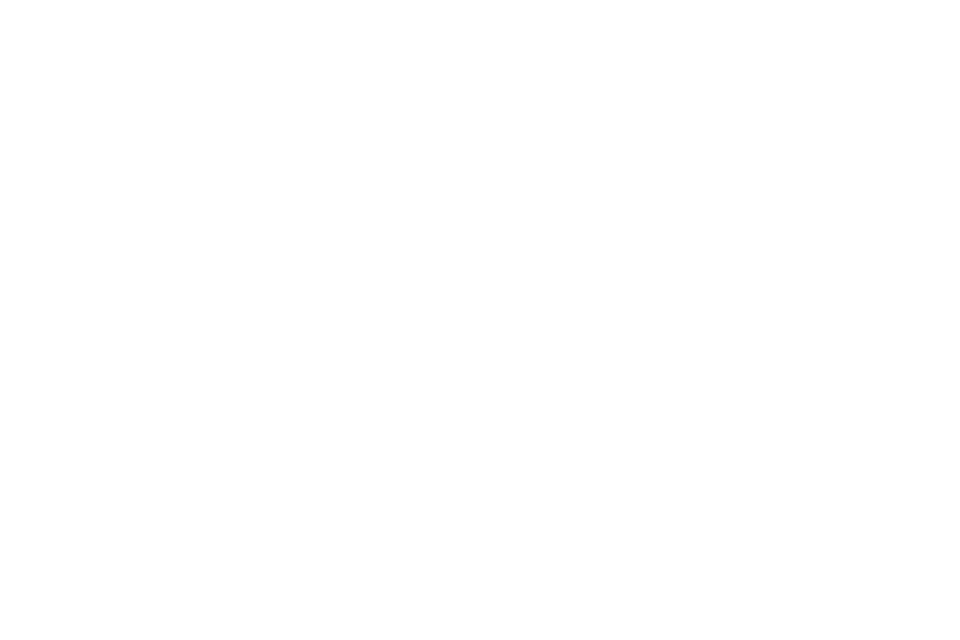

<IPython.core.display.Javascript object>


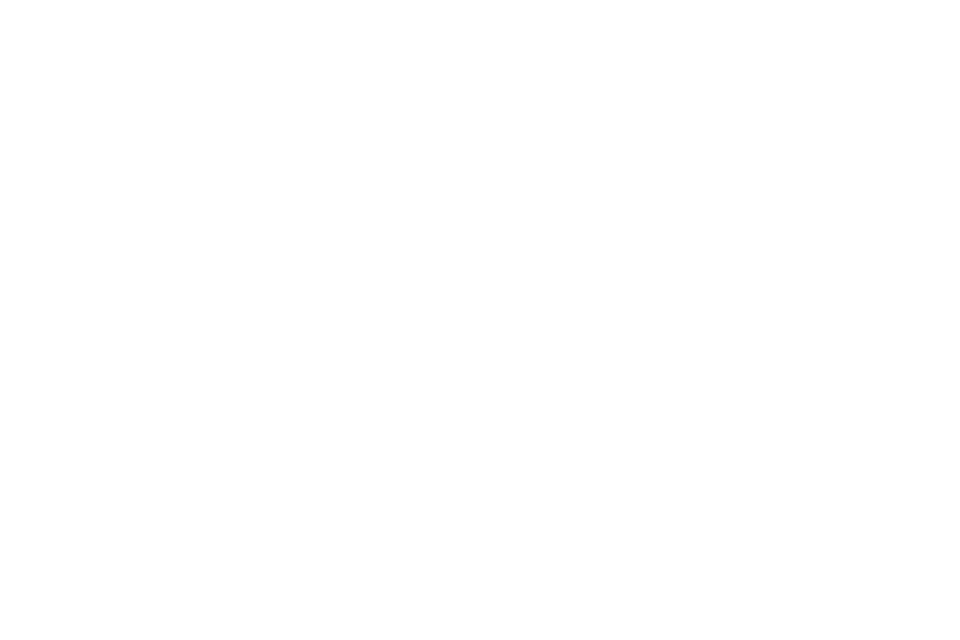

In [15]:
#%matplotlib notebook #Use esse código para poder girar o gráfico plotado
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

X = dados[['HDI', 'newUFM']]
y = dados['newTFR']

X = sm1.add_constant(X)

X2 = grupo1[['HDI', 'newUFM']]
y2 = grupo1['newTFR']

X2 = sm1.add_constant(X2)

est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.HDI.min(), X.HDI.max(), 100), 
                       np.linspace(X.newUFM.min(), X.newUFM.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y2 - est.predict(X2)
ax.scatter(X2[resid >= 0].HDI, X2[resid >= 0].newUFM, y2[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0].HDI, X2[resid < 0].newUFM, y2[resid < 0], c='lightCyan', alpha=1.0)

ax.set_xlabel('HDI')
ax.set_ylabel('UnderFiveMortality')
ax.set_zlabel('TotalFertilityRate')
ax.set_title('Modelo Local com Plano Global - Grupo 1')
plt.show()

### Subgrupo com países cuja população com HIV é superior a 8%

In [14]:
grupo2 = pd.DataFrame()
grupo2['HDI']=dados2[dados2.HIV >= meio].HDI
grupo2['newUFM']=dados2[dados2.HIV >= meio].newUFM
grupo2['newTFR']=dados2[dados2.HIV >= meio].newTFR
grupo2.head()

,HDI,newUFM,newTFR
Pais,,,
Angola,0.471,5.280153,1.874874
Bahamas,0.770,2.694627,0.631272
Barbados,0.791,2.760010,0.604316
Belize,0.692,3.025291,1.088562
Benin,0.414,4.779123,1.680828


<IPython.core.display.Javascript object>


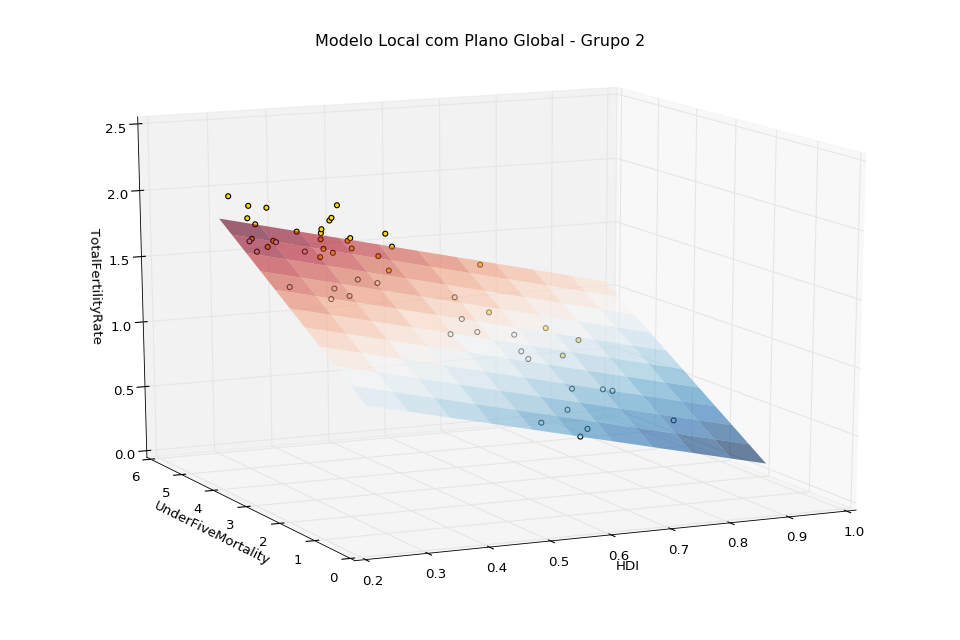

In [15]:
#%matplotlib notebook #Use esse código para poder girar o gráfico plotado
%matplotlib inline 
from mpl_toolkits.mplot3d import Axes3D

X = dados[['HDI', 'newUFM']]
y = dados['newTFR']

X = sm1.add_constant(X)

X2 = grupo2[['HDI', 'newUFM']]
y2 = grupo2['newTFR']

X2 = sm1.add_constant(X2)

est = sm1.OLS(y, X).fit()

xx1, xx2 = np.meshgrid(np.linspace(X.HDI.min(), X.HDI.max(), 100), 
                       np.linspace(X.newUFM.min(), X.newUFM.max(), 100))

Z = est.params[0] + est.params[1] * xx1 + est.params[2] * xx2

fig = plt.figure(figsize=(12, 8))
ax = Axes3D(fig, azim=-115, elev=15)

surf = ax.plot_surface(xx1, xx2, Z, cmap=plt.cm.RdBu_r, alpha=0.6, linewidth=0)

resid = y2 - est.predict(X2)
ax.scatter(X2[resid >= 0].HDI, X2[resid >= 0].newUFM, y2[resid >= 0], c='gold', alpha=1.0, facecolor='white')
ax.scatter(X2[resid < 0].HDI, X2[resid < 0].newUFM, y2[resid < 0], c='lightCyan', alpha=1.0)

ax.set_xlabel('HDI')
ax.set_ylabel('UnderFiveMortality')
ax.set_zlabel('TotalFertilityRate')
ax.set_title('Modelo Local com Plano Global - Grupo 2')
plt.show()

#### Como observamos no gráfico, o modelo global é igualmente válido para um modelo local, pois o plano ajustado do modelo global está em sintonia aos dados do modelo local de forma semelhante àos pontos do modelo global . Além disso, os dois gráficos dos subgrupos se comportam de forma semelhante.

### Considerações Finais

#### Conforme foi observado o valor de R-sqrt, o IDH e a taxa de mortalidade interferem fortemente na qualidade de vida de uma população, que, por consequência,  interfere na taxa de fertilidade. Podemos concluir pelos gráficos que a taxa de mortalidade infantil decresce (ou seja, a qualidade de vida melhora) simultanêamente ao decréscimo da taxa de fertilidade.Através do gráfico do IDH, observamos que quanto maior é o IDH do país menor é taxa de fertilidade. Assim os dois gráficos mostram que países com maior qualidade de vida tendem a ter uma taxa de fertilidade menor.

#### O decaimento da taxa de fertilidade é uma tendência para países de primeiro mundo. Países como a Alemanha já possuem índices negativos de crescimento vegetativos, assim, precisando estimular a população a terem mais filhos. Conforme ocorre uma melhoria na qualidade de vida do país, isso atrai mais saúde, educação e trabalhando. Assim, o acesso a métodos contraceptivos como anticoncepcionais e preservativos aumenta, além disso com o acesso à educação melhora o planejamento familiar, o que reduz a quantidade de filhos por família. A entrada da mulher no mercado de trabalho, também foi um fator para a diminuição da taxa de fertilidade. 

#### Fontes:
#### TodaMateria, “Taxa de Fecundidade”. Disponível em:< https://www.todamateria.com.br/taxa-de-fecundidade/>. Acessado em: 06 dez. 2016.
#### Mundo Educação, “Taxa de Fecundidade”. Disponível em: <http://mundoeducacao.bol.uol.com.br/geografia/taxa-fecundidade.htm>. Acessado em: 06 dez. 2016 
